In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set(style="whitegrid")

In [4]:
labels = pd.read_csv("../train_labels.csv")
values = pd.read_csv("../train_values.csv")

In [5]:
values.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
labels.head(5)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


### Análisis del comportamiento de `damage_grade` en base a la edad (`age`) de cada building

In [7]:
values_joined = values[['building_id', 'age']].merge(labels, how='inner')
values_joined.set_index("building_id", inplace=True)
values_joined.head()

,age,damage_grade
building_id,,
802906,30,3
28830,10,2
94947,10,3
590882,10,2
201944,30,3


In [8]:
values_joined['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
130        9
140        9
180        7
170        6
160        6
175        5
135        5
190        3
145        3
195        2
165        2
185        1
155        1
Name: age, dtype: int64

#### Nos quedamos con los building menores a 50 años que son los que más datos hay

In [9]:
values_less_than_50 = values_joined[values_joined['age'] <= 50]
values_less_than_50

,age,damage_grade
building_id,,
802906,30,3
28830,10,2
94947,10,3
590882,10,2
201944,30,3
...,...,...
159555,0,2
827012,20,3
669485,0,3


In [10]:
less_than_50_grouped = values_less_than_50.groupby("damage_grade").agg({'age': 'count'})
less_than_50_grouped

,age
damage_grade,
1,24691
2,137300
3,80466


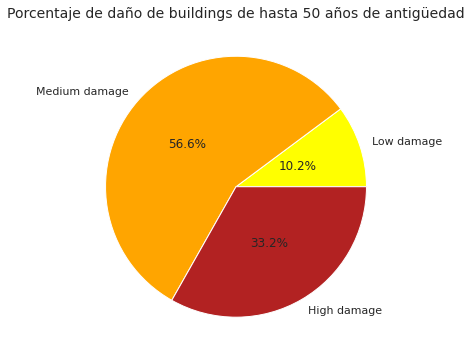

In [11]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=less_than_50_grouped['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de hasta 50 años de antigüedad", fontsize=14);

Text(0, 0.5, 'Años')

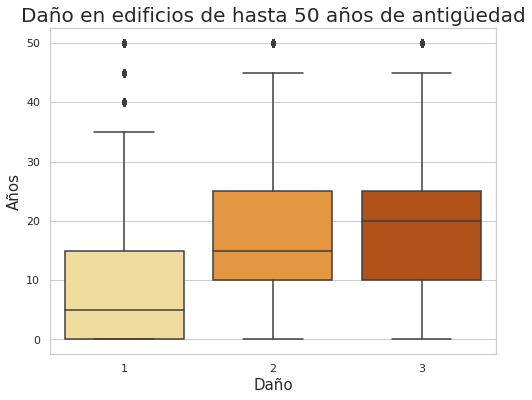

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="damage_grade", y="age", data=values_less_than_50, palette="YlOrBr")
plt.title("Daño en edificios de hasta 50 años de antigüedad", fontsize=20)
plt.xlabel("Daño", fontsize=15)
plt.ylabel("Años", fontsize=15)

#### Nos quedamos con los buildings mayores a 50 años hasta 100 años

In [13]:
values_greater_than_50 = values_joined[(values_joined['age'] > 50) & (values_joined['age'] <= 100)]
values_greater_than_50

,age,damage_grade
building_id,,
563431,55,2
519606,80,2
529366,60,3
833827,70,3
799678,60,2
...,...,...
798100,100,1
814871,55,3
603724,70,3


In [14]:
greater_than_50_grouped = values_greater_than_50.groupby("damage_grade").agg({'age': 'count'})
greater_than_50_grouped

,age
damage_grade,
1,244
2,9682
3,6094


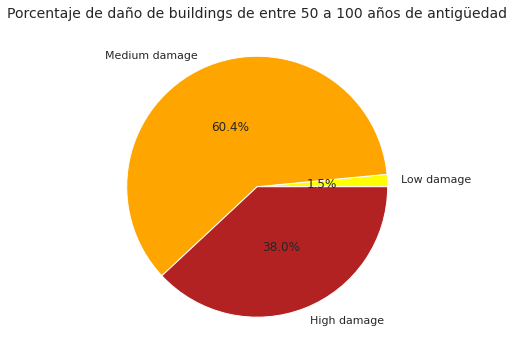

In [15]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=greater_than_50_grouped['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de entre 50 a 100 años de antigüedad", fontsize=14);

Text(0, 0.5, 'Años')

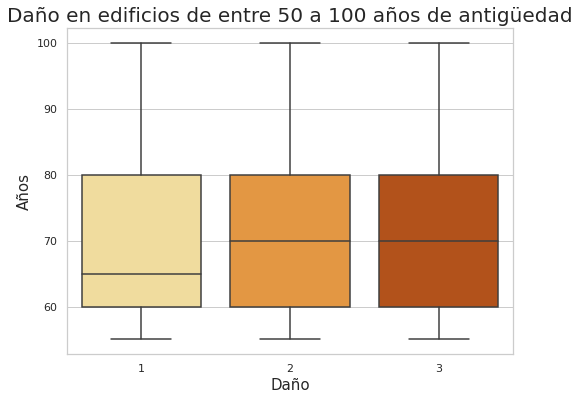

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="damage_grade", y="age", data=values_greater_than_50, palette="YlOrBr")
plt.title("Daño en edificios de entre 50 a 100 años de antigüedad", fontsize=20)
plt.xlabel("Daño", fontsize=15)
plt.ylabel("Años", fontsize=15)

#### Nos quedamos con los buildings de más de 100 años hasta 150 años

In [17]:
values_greater_than_100 = values_joined[(values_joined['age'] > 100) & (values_joined['age'] <= 150)]
values_greater_than_100

,age,damage_grade
building_id,,
370360,105,2
117310,120,2
783077,110,3
249406,120,2
489146,120,2
...,...,...
127207,120,2
821111,105,2
218097,120,3


In [18]:
greater_than_100_grouped = values_greater_than_100.groupby("damage_grade").agg({'age': 'count'})
greater_than_100_grouped

,age
damage_grade,
1,7
2,369
3,219


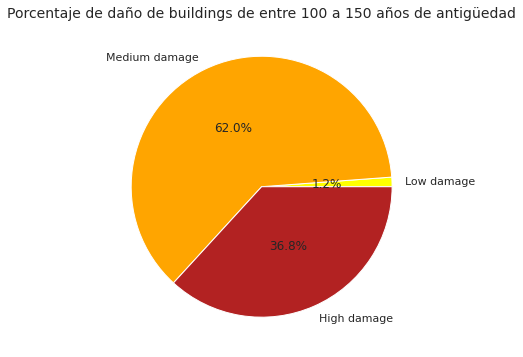

In [19]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=greater_than_100_grouped['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de entre 100 a 150 años de antigüedad", fontsize=14);

Text(0, 0.5, 'Años')

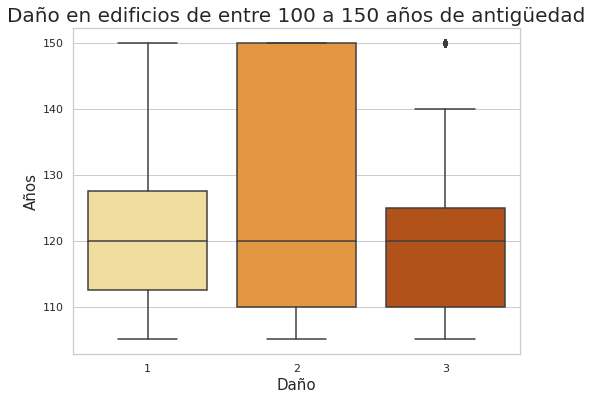

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="damage_grade", y="age", data=values_greater_than_100, palette="YlOrBr")
plt.title("Daño en edificios de entre 100 a 150 años de antigüedad", fontsize=20)
plt.xlabel("Daño", fontsize=15)
plt.ylabel("Años", fontsize=15)

#### Los box plot para el rango de 150 a 200 años y 995 años no son demostrativos.

In [21]:
values_greater_than_150 = values_joined[(values_joined['age'] > 150) & (values_joined['age'] <= 200)]
values_greater_than_150

,age,damage_grade
building_id,,
737045,190,3
486774,200,3
604553,200,2
7408,200,3
39029,200,2
...,...,...
171813,180,2
922476,170,2
1005629,200,3


In [22]:
greater_than_150_grouped = values_greater_than_150.groupby("damage_grade").agg({'age': 'count'})
greater_than_150_grouped

,age
damage_grade,
1,3
2,86
3,50


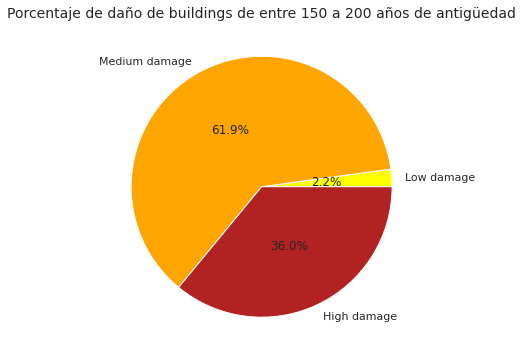

In [23]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=greater_than_150_grouped['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de entre 150 a 200 años de antigüedad", fontsize=14);

#### Nos quedamos con los buildings que tienen 995 años (no hay certeza de que así sea dado que es una edad por fuera del rango que los otros por lo que podrían ser construcciones incluso más antiguas)

In [24]:
values_of_age_995 = values_joined[(values_joined['age'] == 995)]
values_of_age_995

,age,damage_grade
building_id,,
435557,995,2
597626,995,1
7560,995,3
797271,995,1
857371,995,3
...,...,...
160373,995,2
9269,995,2
34321,995,3


In [25]:
age_995_grouped = values_of_age_995.groupby("damage_grade").agg({'age': 'count'})
age_995_grouped

,age
damage_grade,
1,179
2,822
3,389


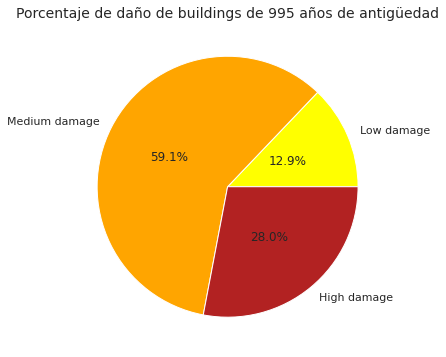

In [26]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=age_995_grouped['age'], autopct="%.1f%%",\
        labels=['Low damage', 'Medium damage', 'High damage'], colors=["yellow", "orange", "firebrick"], pctdistance=0.5)
plt.title("Porcentaje de daño de buildings de 995 años de antigüedad", fontsize=14);

In [36]:
cols = list(values.columns)
new_cols = ["building_id"]

for col in cols:
    if (col.startswith("has_superstructure")):
        new_cols.append(col)

new_cols

['building_id',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other']

In [28]:
less_than_50_merged = values_less_than_50.merge(values[new_cols], right_on='building_id', left_on='building_id', how='left')
less_than_50_merged

,building_id,age,damage_grade,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,802906,30,3,1,1,0,0,0,0,0,0,0,0,0
1,28830,10,2,0,1,0,0,0,0,0,0,0,0,0
2,94947,10,3,0,1,0,0,0,0,0,0,0,0,0
3,590882,10,2,0,1,0,0,0,0,1,1,0,0,0
4,201944,30,3,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242452,159555,0,2,0,0,0,0,1,0,0,0,0,0,0
242453,827012,20,3,0,1,0,0,0,0,0,0,0,0,0
242454,669485,0,3,0,1,0,0,0,0,0,0,0,0,0
242455,151409,10,2,0,0,0,0,0,1,0,0,0,0,0


In [37]:
new_cols.remove('building_id')

In [44]:
functions_to_apply = {}

for col in new_cols:
    functions_to_apply[col] = "sum"

In [48]:
superstructure_grouped_by_age = less_than_50_merged.groupby('age').agg(functions_to_apply)
superstructure_grouped_by_age

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
age,,,,,,,,,,,
0,702,15248,825,811,488,4719,6766,2757,2474,1400,541
5,1317,22581,1072,905,866,4764,9413,3502,2439,1228,533
10,1997,29905,1335,721,1274,3313,10695,3685,1778,729,485
15,2121,29594,1301,659,1383,2102,9657,3154,1296,394,515
20,2677,26761,1057,553,1620,1686,8043,2571,987,206,434
25,2575,20632,809,364,1555,813,5935,1922,638,66,367
30,2221,14941,578,227,1669,620,4158,1216,396,42,277
35,1557,8818,360,136,1244,294,2530,836,253,15,193
40,1659,8510,375,105,1256,284,2350,663,209,12,158


Text(0, 0.5, 'Cantidad de viviendas')

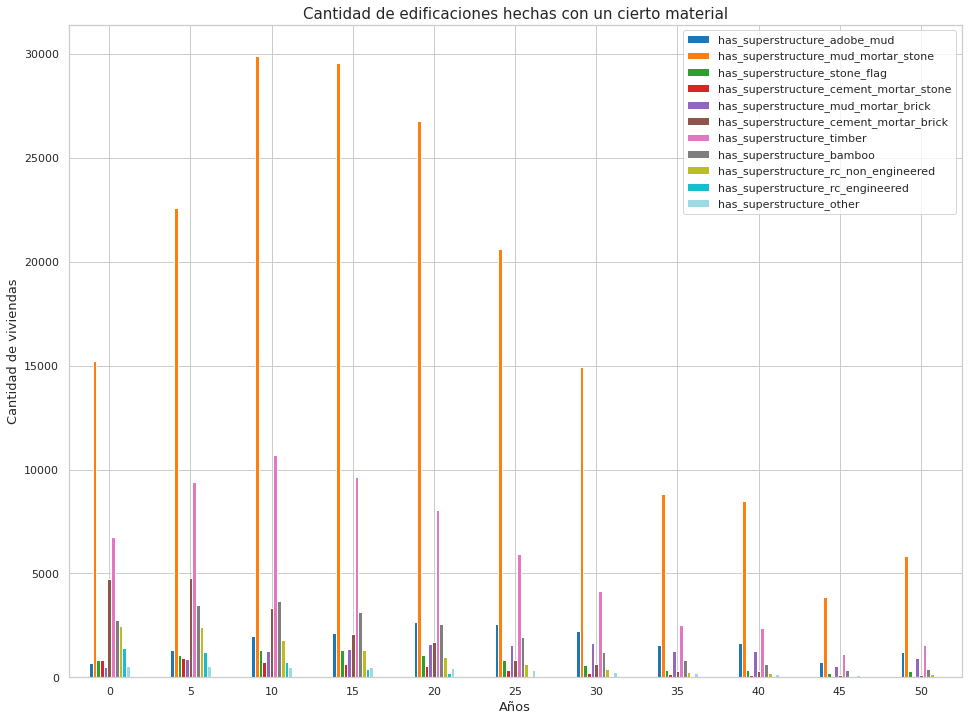

In [98]:
superstructure_grouped_by_age.plot(kind='bar', rot=0, subplots=False, figsize=(16, 12), colormap='tab20')
plt.title("Cantidad de edificaciones hechas con un cierto material", fontsize=15)
plt.xlabel("Años", fontsize=13)
plt.ylabel("Cantidad de viviendas", fontsize=13)

Text(0, 0.5, 'Cantidad de viviendas')

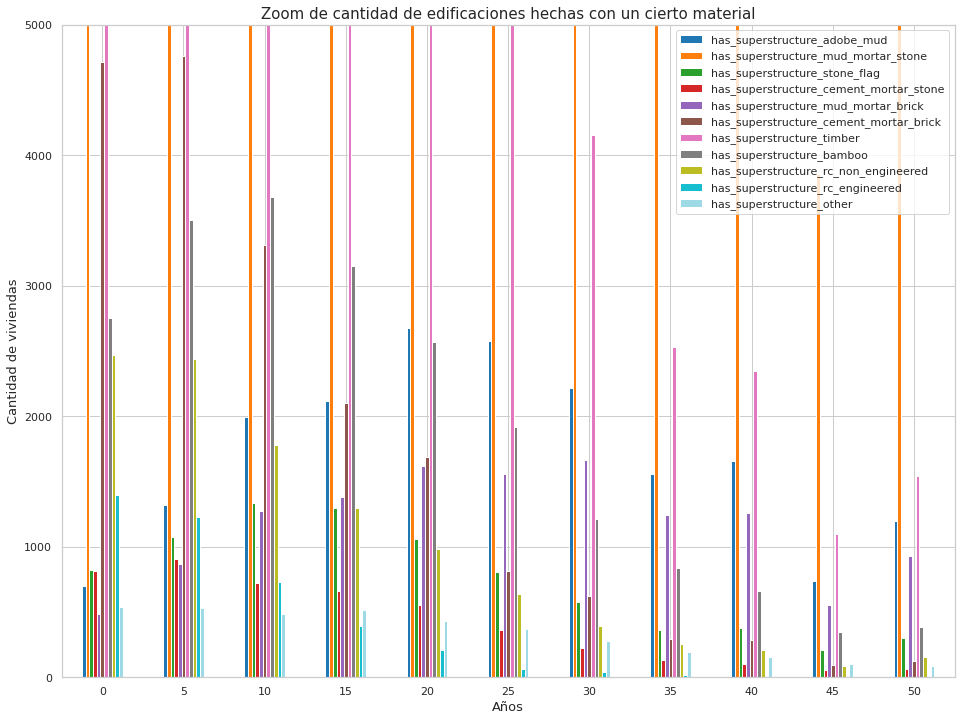

In [99]:
superstructure_grouped_by_age.plot(kind='bar', rot=0, subplots=False, figsize=(16, 12), colormap='tab20', ylim=[0, 5000])
plt.title("Zoom de cantidad de edificaciones hechas con un cierto material", fontsize=15)
plt.xlabel("Años", fontsize=13)
plt.ylabel("Cantidad de viviendas", fontsize=13)

In [105]:
new_cols.remove('has_superstructure_mud_mortar_stone')

functions_to_apply = {}

for col in new_cols:
    functions_to_apply[col] = "sum"

In [106]:
mud_mortar_stone_less_than_50 = less_than_50_merged[less_than_50_merged['has_superstructure_mud_mortar_stone'] == 1]\
                                            .drop(columns=['has_superstructure_mud_mortar_stone'])\
                                            .groupby('age').agg(functions_to_apply)

mud_mortar_stone_less_than_50

,has_superstructure_adobe_mud,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
age,,,,,,,,,,
0,303,450,207,96,133,3712,1234,232,6,195
5,620,674,299,194,162,5908,1940,409,7,275
10,919,922,294,316,173,7521,2397,426,8,300
15,886,953,310,303,166,7557,2331,473,2,357
20,1041,759,300,366,188,6498,2020,434,3,275
25,879,611,208,311,120,4963,1613,418,5,270
30,709,436,131,305,63,3465,975,254,1,202
35,504,288,89,255,37,2111,686,180,1,141
40,514,265,60,190,25,1941,528,159,1,104


Text(0, 0.5, 'Cantidad de viviendas')

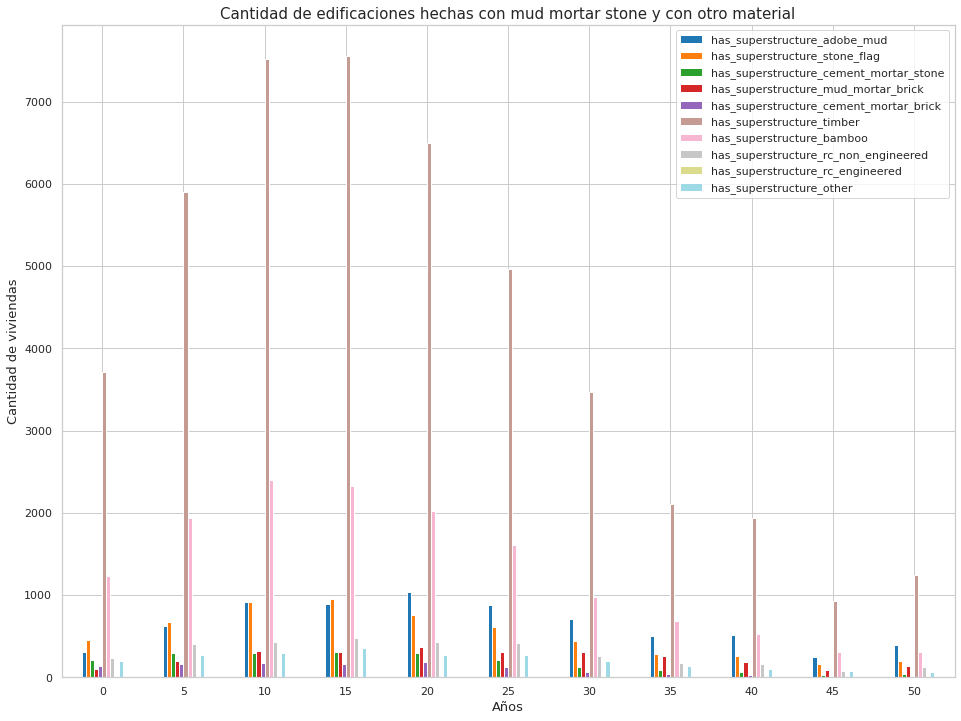

In [109]:
mud_mortar_stone_less_than_50.plot(kind='bar', rot=0, subplots=False, figsize=(16, 12), colormap='tab20')
plt.title("Cantidad de edificaciones hechas con mud mortar stone y con otro material", fontsize=15)
plt.xlabel("Años", fontsize=13)
plt.ylabel("Cantidad de viviendas", fontsize=13)

Text(0, 0.5, 'Cantidad de viviendas')

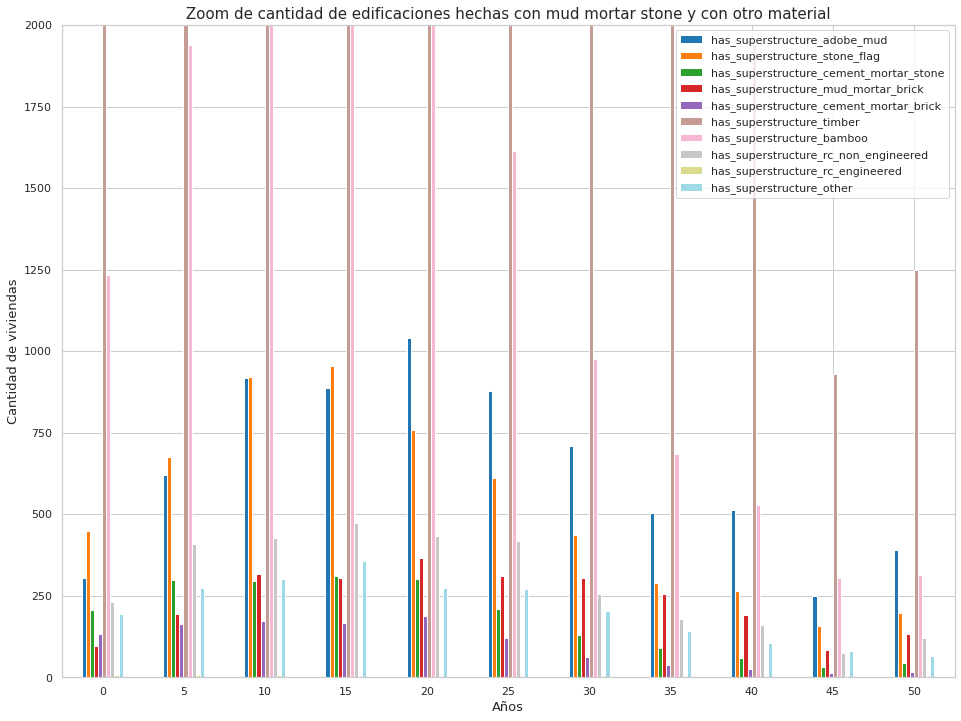

In [110]:
mud_mortar_stone_less_than_50.plot(kind='bar', rot=0, subplots=False, figsize=(16, 12), colormap='tab20', ylim=[0, 2000])
plt.title("Zoom de cantidad de edificaciones hechas con mud mortar stone y con otro material", fontsize=15)
plt.xlabel("Años", fontsize=13)
plt.ylabel("Cantidad de viviendas", fontsize=13)

In [111]:
without_mud_mortar_stone_less_than_50 = less_than_50_merged[less_than_50_merged['has_superstructure_mud_mortar_stone'] == 0]\
                                            .drop(columns=['has_superstructure_mud_mortar_stone'])\
                                            .groupby('age').agg(functions_to_apply)

without_mud_mortar_stone_less_than_50

,has_superstructure_adobe_mud,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
age,,,,,,,,,,
0,399,375,604,392,4586,3054,1523,2242,1394,346
5,697,398,606,672,4602,3505,1562,2030,1221,258
10,1078,413,427,958,3140,3174,1288,1352,721,185
15,1235,348,349,1080,1936,2100,823,823,392,158
20,1636,298,253,1254,1498,1545,551,553,203,159
25,1696,198,156,1244,693,972,309,220,61,97
30,1512,142,96,1364,557,693,241,142,41,75
35,1053,72,47,989,257,419,150,73,14,52
40,1145,110,45,1066,259,409,135,50,11,54


Text(0, 0.5, 'Cantidad de viviendas')

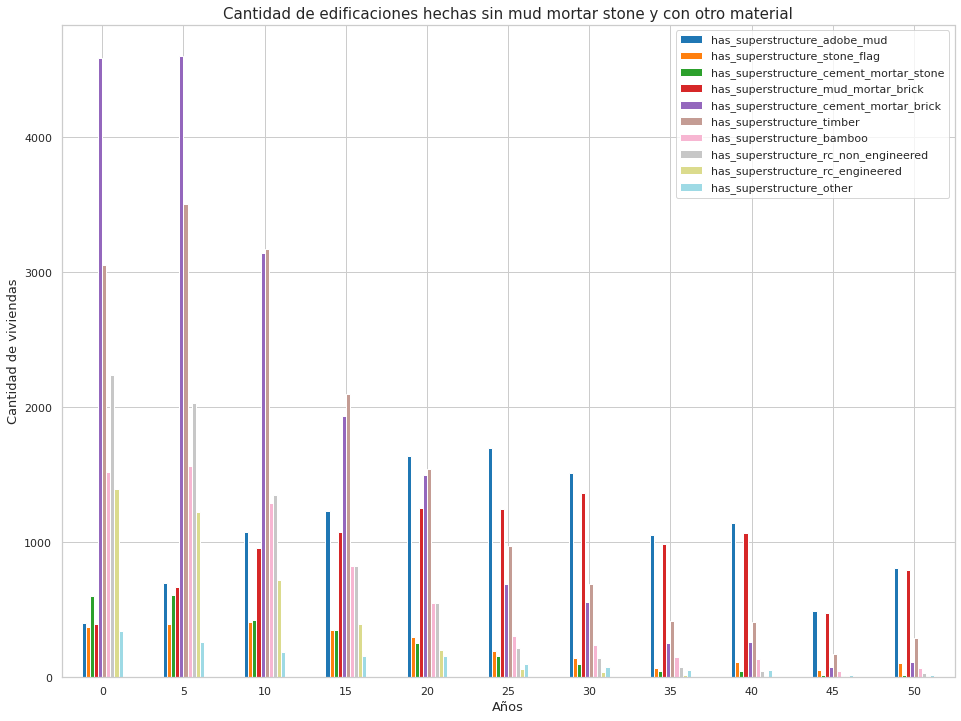

In [116]:
without_mud_mortar_stone_less_than_50.plot(kind='bar', rot=0, subplots=False, figsize=(16, 12), colormap='tab20')
plt.title("Cantidad de edificaciones hechas sin mud mortar stone y con otro material", fontsize=15)
plt.xlabel("Años", fontsize=13)
plt.ylabel("Cantidad de viviendas", fontsize=13)